In [1]:
using LinearAlgebra, IniFile, DifferentialEquations, Plots, LaTeXStrings
using ElectronSpinDynamics

[ Info: Precompiling ElectronSpinDynamics [aa68f387-e3bf-4208-a9fa-5f722d68c8a5] (cache misses: include_dependency fsize change (2), mismatched flags (18))


In [2]:
cfg = read(Inifile(), "input.ini")   # Dict{String,Dict}
# cfg = read(Inifile(), "input-wo-nuclei.ini")   # Dict{String,Dict}
# 1. Pick a section

mol1 = read_molecule(cfg, "electron 1")
mol2 = read_molecule(cfg, "electron 2")
sys = read_system(cfg)
simparams = read_simparams(cfg)

SimParams(ElectronSpinDynamics.SimParamModule.SW, [0.05], 201.0, 0x0000000000002710, "out", [42, 99], Singlet, 1.0)

In [3]:
@show mol1
@show mol2
@show sys
@show simparams

mol1 = Molecule{Int64}(2.0023193, [3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3], [0.5141406139911681 0.0 0.0; -0.13706792618414612 -0.0 -0.0; -0.13706792618414612 -0.0 -0.0; -0.13706792618414612 -0.0 -0.0; -0.44033852832217035 -0.0 -0.0; 0.4546400686867858 0.0 0.0; 0.4546400686867858 0.0 0.0; 0.4546400686867858 0.0 0.0; 0.4262605982027767 0.0 0.0; 0.4233203613613487 0.0 0.0; 0.1784350286060594 0.0 0.0;;; 0.0 0.5141406139911681 0.0; -0.0 -0.13706792618414612 -0.0; -0.0 -0.13706792618414612 -0.0; -0.0 -0.13706792618414612 -0.0; -0.0 -0.44033852832217035 -0.0; 0.0 0.4546400686867858 0.0; 0.0 0.4546400686867858 0.0; 0.0 0.4546400686867858 0.0; 0.0 0.4262605982027767 0.0; 0.0 0.4233203613613487 0.0; 0.0 0.1784350286060594 0.0;;; 0.0 0.0 0.5141406139911681; -0.0 -0.0 -0.13706792618414612; -0.0 -0.0 -0.13706792618414612; -0.0 -0.0 -0.13706792618414612; -0.0 -0.0 -0.44033852832217035; 0.0 0.0 0.4546400686867858; 0.0 0.0 0.4546400686867858; 0.0 0.0 0.4546400686867858; 0.0 0.0 0.4262605982027767; 0.0 0.0 0.

SimParams(ElectronSpinDynamics.SimParamModule.SW, [0.05], 201.0, 0x0000000000002710, "out", [42, 99], Singlet, 1.0)

In [4]:
time_ns = 0:simparams.dt:simparams.simulation_time

0.0:1.0:201.0

In [5]:
results = SC(sys, mol1, mol2, simparams)
B0 = 0.05
tp = results[B0]["T+"]
t0 = results[B0]["T0"]
s = results[B0]["S"]
tm = results[B0]["T-"]
@show s

Using SC2 solver (15 variables for electrons)


LoadError: UndefVarError: `E1y` not defined in `ElectronSpinDynamics.Simulation`
Suggestion: check for spelling errors or missing imports.

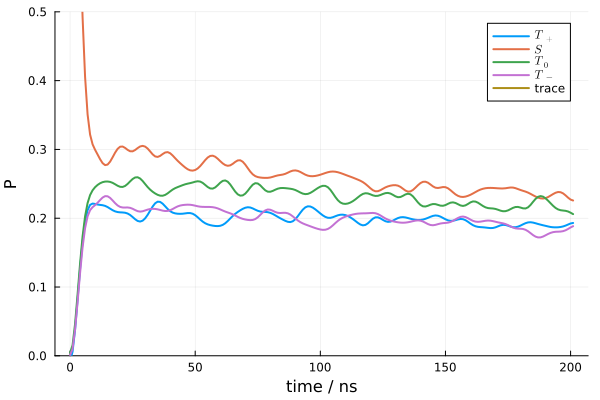

In [ ]:
plt = plot(time_ns, tp, label=L"$T_+$", lw=2)
plot!(plt, time_ns, s, xlabel="time / ns", ylabel="P", label=L"$S$", lw=2)
plot!(plt, time_ns, t0, label=L"$T_0$", lw=2)
plot!(plt, time_ns, tm, label=L"$T_-$", lw=2)
plot!(plt, time_ns, s+tp+tm+t0, label="trace", lw=2)
ylims!(plt, 0, 0.5)
display(plt)

In [ ]:

results = SW(sys, mol1, mol2, simparams)
B0 = 0.05
tp = results[B0]["T+"]
t0 = results[B0]["T0"]
s = results[B0]["S"]
tm = results[B0]["T-"]

202-element Vector{Float64}:
 0.0
 0.010869157519958808
 0.04095801280349221
 0.08358395547769176
 0.12998066983837298
 0.17183701153274272
 0.20342796996845552
 0.22266991833189054
 0.23089523594967676
 0.23162940725815578
 0.22896549886850948
 0.22616584220509545
 0.22491050232902698
 ⋮
 0.16450615076452887
 0.1643211221821005
 0.16457018053175665
 0.1652187922921549
 0.16613085394906374
 0.1671174235779475
 0.16800188729346163
 0.1686697583566818
 0.16908300056807865
 0.1692603496807455
 0.16924290474248732
 0.16906820072694537

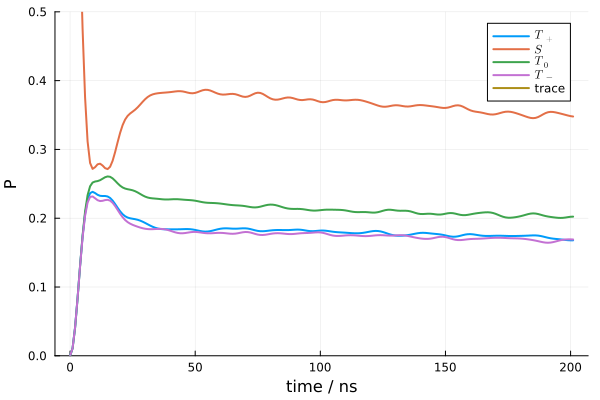

In [ ]:
plt = plot(time_ns, tp, label=L"$T_+$", lw=2)
plot!(plt, time_ns, s, xlabel="time / ns", ylabel="P", label=L"$S$", lw=2)
plot!(plt, time_ns, t0, label=L"$T_0$", lw=2)
plot!(plt, time_ns, tm, label=L"$T_-$", lw=2)
ylims!(plt, 0, 0.5)
plot!(plt, time_ns, s+tp+tm+t0, label="trace", lw=2)
display(plt)

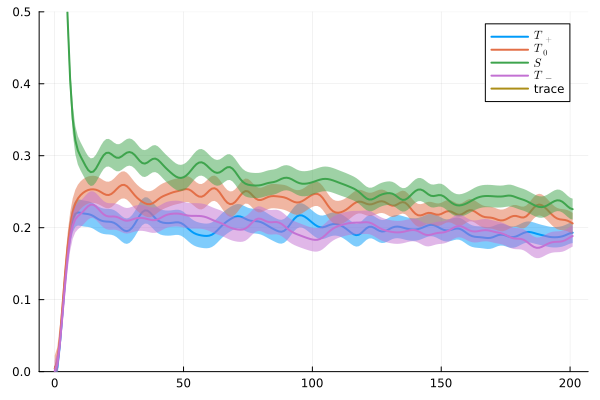

In [ ]:
results = read_results("out/SC")
se_tp = results[0.05]["se_T+"] # standard error std(M) / √N
se_t0 = results[0.05]["se_T0"] # standard error std(M) / √N
se_s = results[0.05]["se_S"] # standard error std(M) / √N
se_tm = results[0.05]["se_T-"] # standard error std(M) / √N
μ_tp = results[0.05]["T+"] # mean of M
μ_t0 = results[0.05]["T0"] # mean of M
μ_s = results[0.05]["S"] # mean of M
μ_tm = results[0.05]["T-"] # mean of M
z = 1.959963984540054  # quantile(Normal(), 0.975)
time_ns = results[0.05]["time_ns"]

plt = plot(time_ns, μ_tp, ribbon=(z*se_tp, z*se_tp), label=L"$T_+$", lw=2)
plot!(plt, time_ns, μ_t0, ribbon=(z*se_t0, z*se_t0), label=L"$T_0$", lw=2)
plot!(plt, time_ns, μ_s, ribbon=(z*se_s, z*se_s), label=L"$S$", lw=2)
plot!(plt, time_ns, μ_tm, ribbon=(z*se_tm, z*se_tm), label=L"$T_-$", lw=2)
plot!(plt, time_ns, μ_tp+μ_t0+μ_s+μ_tm, label="trace", lw=2)
ylims!(plt, 0, 0.5)
display(plt)
savefig(plt, "out/SC_error.png")
